In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


In [3]:
X = data.data
y = data.target

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

y = pd.get_dummies(y1).values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) 

# Building the network

In [101]:
import keras
from keras.optimizers import SGD
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint


def generate_model(input_nodes, hidden_nodes, output_nodes, learning_rate):
    model = Sequential()
    model.add(Dense(units=hidden_nodes,
                    kernel_initializer=keras.initializers.RandomUniform(-100, 100),
                    activation='sigmoid',
                    input_dim=input_nodes))
    model.add(Dense(units=output_nodes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(lr=learning_rate, momentum=0.9, nesterov=True),
                  metrics=['accuracy']                  
                 )
    
    return model

In [102]:
import os
import shutil

dir = '/home/ricardo/mestrado/models/'
if os.path.exists(dir):
    shutil.rmtree(dir)
os.mkdir(dir)

epochs = 1000
learning_rate = 0.0001
hidden_nodes = 1000
input_nodes = X_train.shape[1]
output_nodes = y_train.shape[1]

model = generate_model(input_nodes, hidden_nodes, output_nodes, learning_rate)

save_model_checkpoint = ModelCheckpoint(dir + 'weights.{epoch:04d}-{val_loss:.5f}-{val_acc:.5f}.hdf5',
                                            verbose=0, 
                                            save_best_only=False,                                           
                                            save_weights_only=False,
                                            mode='auto',                                           
                                            period=1)

history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=epochs,
                    callbacks=[save_model_checkpoint]
                   )

Train on 455 samples, validate on 114 samples
Epoch 1/1000
455/455 [==============================] - 0s 594us/step - loss: 0.7722 - acc: 0.5275 - val_loss: 0.5655 - val_acc: 0.6316
Epoch 2/1000
455/455 [==============================] - 0s 96us/step - loss: 0.5902 - acc: 0.6286 - val_loss: 0.5495 - val_acc: 0.6316
Epoch 3/1000
455/455 [==============================] - 0s 96us/step - loss: 0.5441 - acc: 0.6901 - val_loss: 0.5237 - val_acc: 0.8333
Epoch 4/1000
455/455 [==============================] - 0s 119us/step - loss: 0.5289 - acc: 0.8110 - val_loss: 0.5059 - val_acc: 0.7807
Epoch 5/1000
455/455 [==============================] - 0s 102us/step - loss: 0.5167 - acc: 0.7604 - val_loss: 0.4907 - val_acc: 0.8509
Epoch 6/1000
455/455 [==============================] - 0s 93us/step - loss: 0.5010 - acc: 0.8637 - val_loss: 0.4774 - val_acc: 0.8860
Epoch 7/1000
455/455 [==============================] - 0s 95us/step - loss: 0.4879 - acc: 0.8484 - val_loss: 0.4635 - val_acc: 0.8684
Epoch 

455/455 [==============================] - 0s 108us/step - loss: 0.2925 - acc: 0.9077 - val_loss: 0.2684 - val_acc: 0.9035
Epoch 61/1000
455/455 [==============================] - 0s 85us/step - loss: 0.2909 - acc: 0.9077 - val_loss: 0.2682 - val_acc: 0.9035
Epoch 62/1000
455/455 [==============================] - 0s 101us/step - loss: 0.2903 - acc: 0.9033 - val_loss: 0.2666 - val_acc: 0.8947
Epoch 63/1000
455/455 [==============================] - 0s 111us/step - loss: 0.2888 - acc: 0.9055 - val_loss: 0.2656 - val_acc: 0.8947
Epoch 64/1000
455/455 [==============================] - 0s 92us/step - loss: 0.2880 - acc: 0.9077 - val_loss: 0.2647 - val_acc: 0.8947
Epoch 65/1000
455/455 [==============================] - 0s 98us/step - loss: 0.2871 - acc: 0.9077 - val_loss: 0.2632 - val_acc: 0.9035
Epoch 66/1000
455/455 [==============================] - 0s 85us/step - loss: 0.2865 - acc: 0.9077 - val_loss: 0.2624 - val_acc: 0.8947
Epoch 67/1000
455/455 [==============================] - 0s

455/455 [==============================] - 0s 88us/step - loss: 0.2490 - acc: 0.9099 - val_loss: 0.2311 - val_acc: 0.9123
Epoch 121/1000
455/455 [==============================] - 0s 77us/step - loss: 0.2491 - acc: 0.9099 - val_loss: 0.2309 - val_acc: 0.9123
Epoch 122/1000
455/455 [==============================] - 0s 80us/step - loss: 0.2481 - acc: 0.9099 - val_loss: 0.2300 - val_acc: 0.9123
Epoch 123/1000
455/455 [==============================] - 0s 88us/step - loss: 0.2477 - acc: 0.9121 - val_loss: 0.2304 - val_acc: 0.9123
Epoch 124/1000
455/455 [==============================] - 0s 90us/step - loss: 0.2473 - acc: 0.9099 - val_loss: 0.2298 - val_acc: 0.9123
Epoch 125/1000
455/455 [==============================] - 0s 95us/step - loss: 0.2470 - acc: 0.9077 - val_loss: 0.2314 - val_acc: 0.9123
Epoch 126/1000
455/455 [==============================] - 0s 87us/step - loss: 0.2464 - acc: 0.9099 - val_loss: 0.2298 - val_acc: 0.9123
Epoch 127/1000
455/455 [==============================] 

Epoch 180/1000
455/455 [==============================] - 0s 89us/step - loss: 0.2286 - acc: 0.9099 - val_loss: 0.2146 - val_acc: 0.9211
Epoch 181/1000
455/455 [==============================] - 0s 83us/step - loss: 0.2281 - acc: 0.9143 - val_loss: 0.2153 - val_acc: 0.9123
Epoch 182/1000
455/455 [==============================] - 0s 80us/step - loss: 0.2282 - acc: 0.9143 - val_loss: 0.2156 - val_acc: 0.9123
Epoch 183/1000
455/455 [==============================] - 0s 98us/step - loss: 0.2278 - acc: 0.9143 - val_loss: 0.2145 - val_acc: 0.9211
Epoch 184/1000
455/455 [==============================] - 0s 85us/step - loss: 0.2275 - acc: 0.9143 - val_loss: 0.2148 - val_acc: 0.9123
Epoch 185/1000
455/455 [==============================] - 0s 78us/step - loss: 0.2281 - acc: 0.9187 - val_loss: 0.2159 - val_acc: 0.9211
Epoch 186/1000
455/455 [==============================] - 0s 114us/step - loss: 0.2278 - acc: 0.9143 - val_loss: 0.2140 - val_acc: 0.9211
Epoch 187/1000
455/455 [================

455/455 [==============================] - 0s 91us/step - loss: 0.2174 - acc: 0.9231 - val_loss: 0.2084 - val_acc: 0.9211
Epoch 240/1000
455/455 [==============================] - 0s 81us/step - loss: 0.2165 - acc: 0.9209 - val_loss: 0.2062 - val_acc: 0.9298
Epoch 241/1000
455/455 [==============================] - 0s 88us/step - loss: 0.2160 - acc: 0.9209 - val_loss: 0.2067 - val_acc: 0.9298
Epoch 242/1000
455/455 [==============================] - 0s 80us/step - loss: 0.2163 - acc: 0.9231 - val_loss: 0.2074 - val_acc: 0.9211
Epoch 243/1000
455/455 [==============================] - 0s 96us/step - loss: 0.2155 - acc: 0.9231 - val_loss: 0.2061 - val_acc: 0.9298
Epoch 244/1000
455/455 [==============================] - 0s 93us/step - loss: 0.2159 - acc: 0.9231 - val_loss: 0.2064 - val_acc: 0.9298
Epoch 245/1000
455/455 [==============================] - 0s 93us/step - loss: 0.2153 - acc: 0.9231 - val_loss: 0.2059 - val_acc: 0.9298
Epoch 246/1000
455/455 [==============================] 

455/455 [==============================] - 0s 109us/step - loss: 0.2094 - acc: 0.9231 - val_loss: 0.2034 - val_acc: 0.9211
Epoch 299/1000
455/455 [==============================] - 0s 112us/step - loss: 0.2082 - acc: 0.9231 - val_loss: 0.2011 - val_acc: 0.9298
Epoch 300/1000
455/455 [==============================] - 0s 97us/step - loss: 0.2082 - acc: 0.9231 - val_loss: 0.2010 - val_acc: 0.9298
Epoch 301/1000
455/455 [==============================] - 0s 84us/step - loss: 0.2083 - acc: 0.9231 - val_loss: 0.2005 - val_acc: 0.9298
Epoch 302/1000
455/455 [==============================] - 0s 75us/step - loss: 0.2078 - acc: 0.9231 - val_loss: 0.2021 - val_acc: 0.9298
Epoch 303/1000
455/455 [==============================] - 0s 110us/step - loss: 0.2092 - acc: 0.9275 - val_loss: 0.2051 - val_acc: 0.9123
Epoch 304/1000
455/455 [==============================] - 0s 109us/step - loss: 0.2087 - acc: 0.9253 - val_loss: 0.2044 - val_acc: 0.9123
Epoch 305/1000
455/455 [============================

Epoch 358/1000
455/455 [==============================] - 0s 110us/step - loss: 0.2023 - acc: 0.9231 - val_loss: 0.1979 - val_acc: 0.9298
Epoch 359/1000
455/455 [==============================] - ETA: 0s - loss: 0.2300 - acc: 0.906 - 0s 74us/step - loss: 0.2021 - acc: 0.9231 - val_loss: 0.1984 - val_acc: 0.9298
Epoch 360/1000
455/455 [==============================] - 0s 81us/step - loss: 0.2019 - acc: 0.9231 - val_loss: 0.1985 - val_acc: 0.9298
Epoch 361/1000
455/455 [==============================] - 0s 87us/step - loss: 0.2025 - acc: 0.9253 - val_loss: 0.1986 - val_acc: 0.9298
Epoch 362/1000
455/455 [==============================] - 0s 77us/step - loss: 0.2019 - acc: 0.9231 - val_loss: 0.1970 - val_acc: 0.9298
Epoch 363/1000
455/455 [==============================] - 0s 120us/step - loss: 0.2018 - acc: 0.9231 - val_loss: 0.1977 - val_acc: 0.9298
Epoch 364/1000
455/455 [==============================] - 0s 105us/step - loss: 0.2020 - acc: 0.9231 - val_loss: 0.1983 - val_acc: 0.9298


455/455 [==============================] - 0s 93us/step - loss: 0.1975 - acc: 0.9231 - val_loss: 0.1943 - val_acc: 0.9298
Epoch 418/1000
455/455 [==============================] - 0s 99us/step - loss: 0.1975 - acc: 0.9253 - val_loss: 0.1944 - val_acc: 0.9298
Epoch 419/1000
455/455 [==============================] - 0s 88us/step - loss: 0.1974 - acc: 0.9253 - val_loss: 0.1944 - val_acc: 0.9298
Epoch 420/1000
455/455 [==============================] - 0s 79us/step - loss: 0.1973 - acc: 0.9231 - val_loss: 0.1951 - val_acc: 0.9298
Epoch 421/1000
455/455 [==============================] - 0s 101us/step - loss: 0.1975 - acc: 0.9231 - val_loss: 0.1941 - val_acc: 0.9298
Epoch 422/1000
455/455 [==============================] - 0s 126us/step - loss: 0.1978 - acc: 0.9231 - val_loss: 0.1955 - val_acc: 0.9298
Epoch 423/1000
455/455 [==============================] - 0s 108us/step - loss: 0.1976 - acc: 0.9231 - val_loss: 0.1949 - val_acc: 0.9298
Epoch 424/1000
455/455 [=============================

Epoch 477/1000
455/455 [==============================] - 0s 101us/step - loss: 0.1941 - acc: 0.9231 - val_loss: 0.1915 - val_acc: 0.9298
Epoch 478/1000
455/455 [==============================] - 0s 85us/step - loss: 0.1939 - acc: 0.9231 - val_loss: 0.1922 - val_acc: 0.9298
Epoch 479/1000
455/455 [==============================] - 0s 98us/step - loss: 0.1936 - acc: 0.9231 - val_loss: 0.1923 - val_acc: 0.9298
Epoch 480/1000
455/455 [==============================] - 0s 90us/step - loss: 0.1938 - acc: 0.9231 - val_loss: 0.1921 - val_acc: 0.9298
Epoch 481/1000
455/455 [==============================] - 0s 92us/step - loss: 0.1935 - acc: 0.9231 - val_loss: 0.1927 - val_acc: 0.9298
Epoch 482/1000
455/455 [==============================] - 0s 90us/step - loss: 0.1934 - acc: 0.9231 - val_loss: 0.1920 - val_acc: 0.9298
Epoch 483/1000
455/455 [==============================] - 0s 99us/step - loss: 0.1939 - acc: 0.9231 - val_loss: 0.1917 - val_acc: 0.9298
Epoch 484/1000
455/455 [================

455/455 [==============================] - 0s 68us/step - loss: 0.1907 - acc: 0.9297 - val_loss: 0.1916 - val_acc: 0.9298
Epoch 537/1000
455/455 [==============================] - 0s 94us/step - loss: 0.1906 - acc: 0.9275 - val_loss: 0.1907 - val_acc: 0.9298
Epoch 538/1000
455/455 [==============================] - 0s 84us/step - loss: 0.1906 - acc: 0.9231 - val_loss: 0.1902 - val_acc: 0.9298
Epoch 539/1000
455/455 [==============================] - 0s 85us/step - loss: 0.1907 - acc: 0.9275 - val_loss: 0.1912 - val_acc: 0.9298
Epoch 540/1000
455/455 [==============================] - 0s 92us/step - loss: 0.1904 - acc: 0.9275 - val_loss: 0.1906 - val_acc: 0.9298
Epoch 541/1000
455/455 [==============================] - 0s 99us/step - loss: 0.1904 - acc: 0.9275 - val_loss: 0.1907 - val_acc: 0.9298
Epoch 542/1000
455/455 [==============================] - 0s 88us/step - loss: 0.1903 - acc: 0.9275 - val_loss: 0.1908 - val_acc: 0.9298
Epoch 543/1000
455/455 [==============================] 

Epoch 596/1000
455/455 [==============================] - 0s 91us/step - loss: 0.1880 - acc: 0.9275 - val_loss: 0.1876 - val_acc: 0.9298
Epoch 597/1000
455/455 [==============================] - 0s 94us/step - loss: 0.1889 - acc: 0.9231 - val_loss: 0.1879 - val_acc: 0.9298
Epoch 598/1000
455/455 [==============================] - 0s 98us/step - loss: 0.1887 - acc: 0.9297 - val_loss: 0.1909 - val_acc: 0.9211
Epoch 599/1000
455/455 [==============================] - 0s 71us/step - loss: 0.1879 - acc: 0.9341 - val_loss: 0.1887 - val_acc: 0.9298
Epoch 600/1000
455/455 [==============================] - 0s 70us/step - loss: 0.1879 - acc: 0.9275 - val_loss: 0.1885 - val_acc: 0.9298
Epoch 601/1000
455/455 [==============================] - 0s 70us/step - loss: 0.1877 - acc: 0.9275 - val_loss: 0.1893 - val_acc: 0.9298
Epoch 602/1000
455/455 [==============================] - 0s 84us/step - loss: 0.1880 - acc: 0.9297 - val_loss: 0.1900 - val_acc: 0.9298
Epoch 603/1000
455/455 [=================

Epoch 656/1000
455/455 [==============================] - 0s 95us/step - loss: 0.1856 - acc: 0.9341 - val_loss: 0.1890 - val_acc: 0.9298
Epoch 657/1000
455/455 [==============================] - 0s 87us/step - loss: 0.1857 - acc: 0.9363 - val_loss: 0.1889 - val_acc: 0.9298
Epoch 658/1000
455/455 [==============================] - 0s 76us/step - loss: 0.1857 - acc: 0.9363 - val_loss: 0.1887 - val_acc: 0.9298
Epoch 659/1000
455/455 [==============================] - 0s 84us/step - loss: 0.1855 - acc: 0.9363 - val_loss: 0.1881 - val_acc: 0.9298
Epoch 660/1000
455/455 [==============================] - 0s 111us/step - loss: 0.1855 - acc: 0.9319 - val_loss: 0.1876 - val_acc: 0.9298
Epoch 661/1000
455/455 [==============================] - 0s 109us/step - loss: 0.1856 - acc: 0.9319 - val_loss: 0.1877 - val_acc: 0.9298
Epoch 662/1000
455/455 [==============================] - 0s 153us/step - loss: 0.1855 - acc: 0.9297 - val_loss: 0.1871 - val_acc: 0.9298
Epoch 663/1000
455/455 [==============

455/455 [==============================] - 0s 100us/step - loss: 0.1835 - acc: 0.9341 - val_loss: 0.1861 - val_acc: 0.9298
Epoch 716/1000
455/455 [==============================] - 0s 83us/step - loss: 0.1835 - acc: 0.9341 - val_loss: 0.1860 - val_acc: 0.9298
Epoch 717/1000
455/455 [==============================] - 0s 91us/step - loss: 0.1839 - acc: 0.9297 - val_loss: 0.1855 - val_acc: 0.9298
Epoch 718/1000
455/455 [==============================] - 0s 92us/step - loss: 0.1838 - acc: 0.9297 - val_loss: 0.1856 - val_acc: 0.9298
Epoch 719/1000
455/455 [==============================] - 0s 84us/step - loss: 0.1834 - acc: 0.9341 - val_loss: 0.1870 - val_acc: 0.9298
Epoch 720/1000
455/455 [==============================] - 0s 77us/step - loss: 0.1834 - acc: 0.9341 - val_loss: 0.1872 - val_acc: 0.9298
Epoch 721/1000
455/455 [==============================] - 0s 96us/step - loss: 0.1840 - acc: 0.9385 - val_loss: 0.1879 - val_acc: 0.9211
Epoch 722/1000
455/455 [==============================]

Epoch 775/1000
455/455 [==============================] - 0s 112us/step - loss: 0.1817 - acc: 0.9385 - val_loss: 0.1876 - val_acc: 0.9123
Epoch 776/1000
455/455 [==============================] - 0s 112us/step - loss: 0.1825 - acc: 0.9363 - val_loss: 0.1867 - val_acc: 0.9211
Epoch 777/1000
455/455 [==============================] - 0s 103us/step - loss: 0.1822 - acc: 0.9385 - val_loss: 0.1878 - val_acc: 0.9123
Epoch 778/1000
455/455 [==============================] - 0s 91us/step - loss: 0.1819 - acc: 0.9385 - val_loss: 0.1870 - val_acc: 0.9211
Epoch 779/1000
455/455 [==============================] - 0s 99us/step - loss: 0.1819 - acc: 0.9341 - val_loss: 0.1857 - val_acc: 0.9298
Epoch 780/1000
455/455 [==============================] - 0s 87us/step - loss: 0.1818 - acc: 0.9341 - val_loss: 0.1854 - val_acc: 0.9298
Epoch 781/1000
455/455 [==============================] - 0s 80us/step - loss: 0.1815 - acc: 0.9341 - val_loss: 0.1850 - val_acc: 0.9298
Epoch 782/1000
455/455 [==============

455/455 [==============================] - 0s 93us/step - loss: 0.1805 - acc: 0.9341 - val_loss: 0.1842 - val_acc: 0.9298
Epoch 835/1000
455/455 [==============================] - 0s 87us/step - loss: 0.1806 - acc: 0.9385 - val_loss: 0.1862 - val_acc: 0.9211
Epoch 836/1000
455/455 [==============================] - 0s 90us/step - loss: 0.1801 - acc: 0.9407 - val_loss: 0.1856 - val_acc: 0.9211
Epoch 837/1000
455/455 [==============================] - 0s 93us/step - loss: 0.1800 - acc: 0.9341 - val_loss: 0.1844 - val_acc: 0.9298
Epoch 838/1000
455/455 [==============================] - 0s 81us/step - loss: 0.1798 - acc: 0.9363 - val_loss: 0.1848 - val_acc: 0.9298
Epoch 839/1000
455/455 [==============================] - 0s 79us/step - loss: 0.1798 - acc: 0.9341 - val_loss: 0.1842 - val_acc: 0.9298
Epoch 840/1000
455/455 [==============================] - 0s 68us/step - loss: 0.1799 - acc: 0.9341 - val_loss: 0.1837 - val_acc: 0.9298
Epoch 841/1000
455/455 [==============================] 

Epoch 894/1000
455/455 [==============================] - 0s 82us/step - loss: 0.1789 - acc: 0.9341 - val_loss: 0.1827 - val_acc: 0.9298
Epoch 895/1000
455/455 [==============================] - 0s 93us/step - loss: 0.1781 - acc: 0.9341 - val_loss: 0.1845 - val_acc: 0.9211
Epoch 896/1000
455/455 [==============================] - 0s 108us/step - loss: 0.1782 - acc: 0.9407 - val_loss: 0.1860 - val_acc: 0.9123
Epoch 897/1000
455/455 [==============================] - 0s 105us/step - loss: 0.1785 - acc: 0.9407 - val_loss: 0.1853 - val_acc: 0.9211
Epoch 898/1000
455/455 [==============================] - 0s 101us/step - loss: 0.1788 - acc: 0.9407 - val_loss: 0.1845 - val_acc: 0.9211
Epoch 899/1000
455/455 [==============================] - 0s 104us/step - loss: 0.1781 - acc: 0.9407 - val_loss: 0.1854 - val_acc: 0.9123
Epoch 900/1000
455/455 [==============================] - 0s 108us/step - loss: 0.1785 - acc: 0.9407 - val_loss: 0.1849 - val_acc: 0.9211
Epoch 901/1000
455/455 [============

455/455 [==============================] - 0s 75us/step - loss: 0.1769 - acc: 0.9407 - val_loss: 0.1827 - val_acc: 0.9298
Epoch 954/1000
455/455 [==============================] - 0s 111us/step - loss: 0.1768 - acc: 0.9341 - val_loss: 0.1830 - val_acc: 0.9211
Epoch 955/1000
455/455 [==============================] - 0s 78us/step - loss: 0.1770 - acc: 0.9385 - val_loss: 0.1836 - val_acc: 0.9211
Epoch 956/1000
455/455 [==============================] - 0s 91us/step - loss: 0.1768 - acc: 0.9407 - val_loss: 0.1828 - val_acc: 0.9298
Epoch 957/1000
455/455 [==============================] - 0s 83us/step - loss: 0.1768 - acc: 0.9341 - val_loss: 0.1823 - val_acc: 0.9298
Epoch 958/1000
455/455 [==============================] - 0s 86us/step - loss: 0.1768 - acc: 0.9341 - val_loss: 0.1827 - val_acc: 0.9298
Epoch 959/1000
455/455 [==============================] - 0s 74us/step - loss: 0.1768 - acc: 0.9341 - val_loss: 0.1832 - val_acc: 0.9211
Epoch 960/1000
455/455 [==============================]

In [103]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [104]:
print('best accuracy: %.3f' % max(history.history['acc']))
print('best validation accuracy: %.3f' % max(history.history['val_acc']))

best accuracy: 0.943
best validation accuracy: 0.930


# Weight analysis

In [105]:
def output_data(layer):
    print('min :', np.min(layer))
    print('std-:', np.average(layer)-np.std(layer))
    print('avg :', np.average(layer))
    print('std+:', np.average(layer)+np.std(layer))
    print('max :', np.max(layer))
    print()
    
def bias_not_zeros(l):
    return np.sum(abs(l) >= 0) - np.sum(abs(l) < 1e-10)

def weight_input_not_zeros(l):
    return bias_not_zeros(np.abs(l).sum(axis=1))

def weight_output_not_zeros(l):
    return bias_not_zeros(np.abs(l).sum(axis=0))

m = generate_model(input_nodes, hidden_nodes, output_nodes, learning_rate)
def process_epoch(n):
    files = sorted(os.listdir(dir))    
    filename = dir+files[n]
    m.load_weights(filename)

    first_layer_weights = m.layers[0].get_weights()[0]
    first_layer_biases = m.layers[0].get_weights()[1]
    second_layer_weights = m.layers[1].get_weights()[0]
    second_layer_biases = m.layers[1].get_weights()[1]
    
    return {
        'w1': first_layer_weights,
        'w1nzi': weight_input_not_zeros(first_layer_weights),
        'w1nzo': weight_output_not_zeros(first_layer_weights),
        'b1': first_layer_biases,
        'b1nz': bias_not_zeros(first_layer_biases),
        'w2': second_layer_weights,
        'w2nzi': weight_input_not_zeros(second_layer_weights),
        'w2nzo': weight_output_not_zeros(second_layer_weights),
        'b2': second_layer_biases,
        'b2nz': bias_not_zeros(second_layer_biases)
    }

a = process_epoch(200)

# Graphics

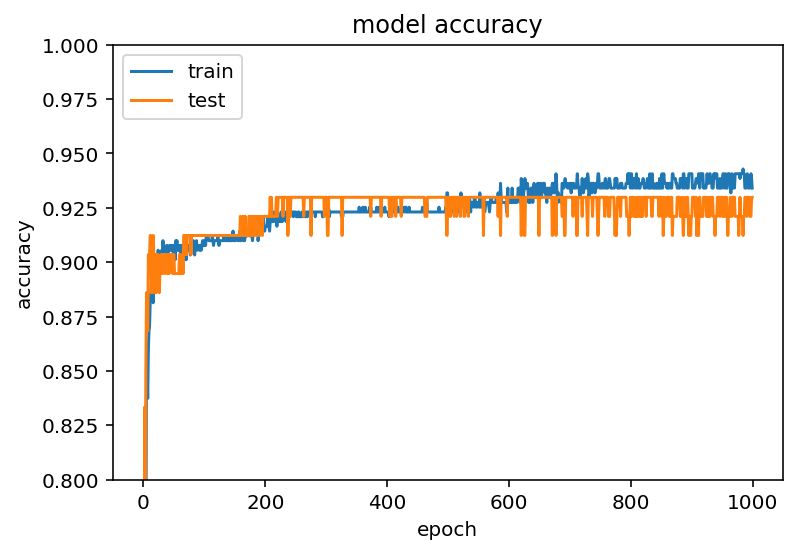

In [106]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0.8, 1.0])
plt.show()

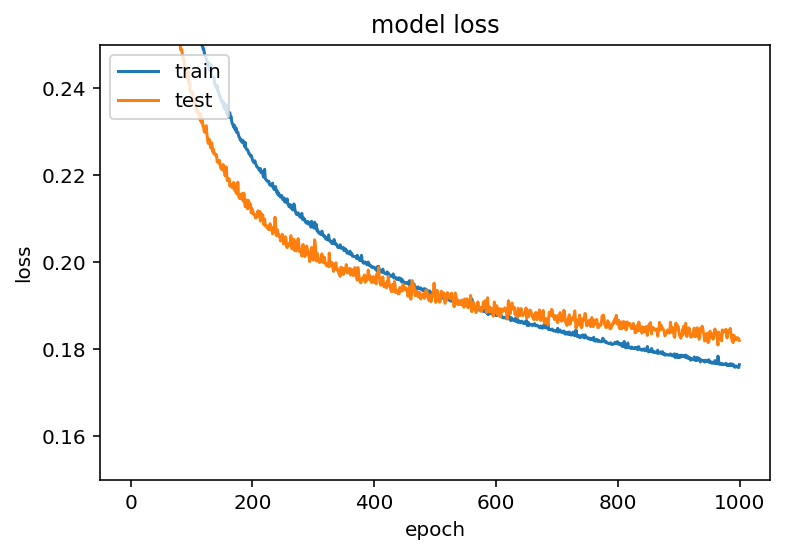

In [107]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0.15, 0.25])
plt.show()

In [108]:
first_layer_weight_avg = []
first_layer_bias_avg = []
first_layer_bias_not_zero = []
w1nzi = []
w1nzo = []

second_layer_weight_avg = []
second_layer_bias_avg = []
second_layer_bias_not_zero = []
w2nzi = []
w2nzo = []

for i in range(epochs):
    r = process_epoch(i)
    first_layer_weight_avg.append(np.average(r['w1']))
    first_layer_bias_avg.append(np.average(r['b1']))
    first_layer_bias_not_zero.append(r['b1nz'])
    w1nzi.append(r['w1nzi'])
    w1nzo.append(r['w1nzo'])
    
    second_layer_weight_avg.append(np.average(r['w2']))
    second_layer_bias_avg.append(np.average(r['b2']))
    second_layer_bias_not_zero.append(r['b2nz'])
    w2nzi.append(r['w2nzi'])
    w2nzo.append(r['w2nzo'])

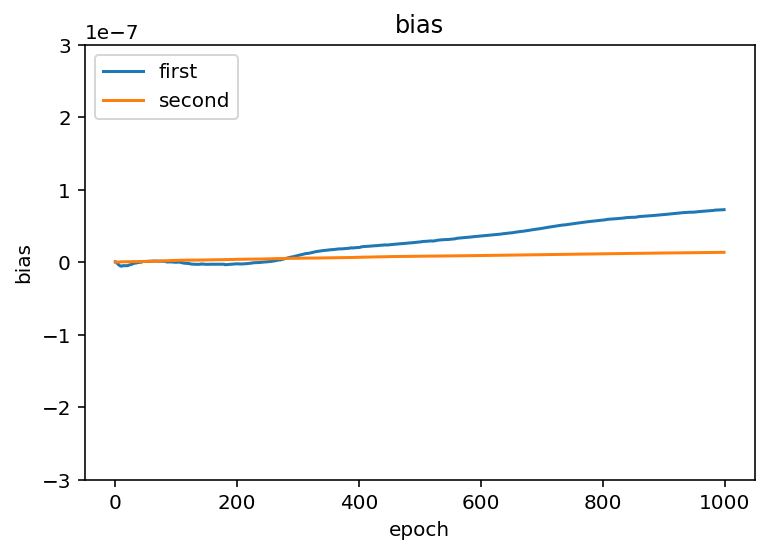

In [120]:
plt.plot(first_layer_bias_avg)
plt.plot(second_layer_bias_avg)
plt.title('bias')
plt.ylabel('bias')
plt.xlabel('epoch')
plt.legend(['first', 'second'], loc='upper left')
plt.ylim([-3e-7, 3e-7])
plt.show()

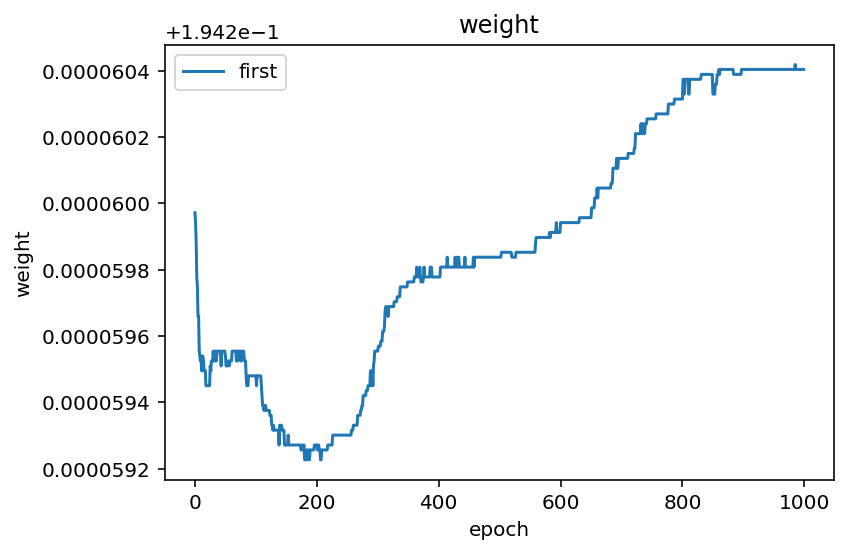

In [110]:
plt.plot(first_layer_weight_avg)
plt.title('weight')
plt.ylabel('weight')
plt.xlabel('epoch')
plt.legend(['first'], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

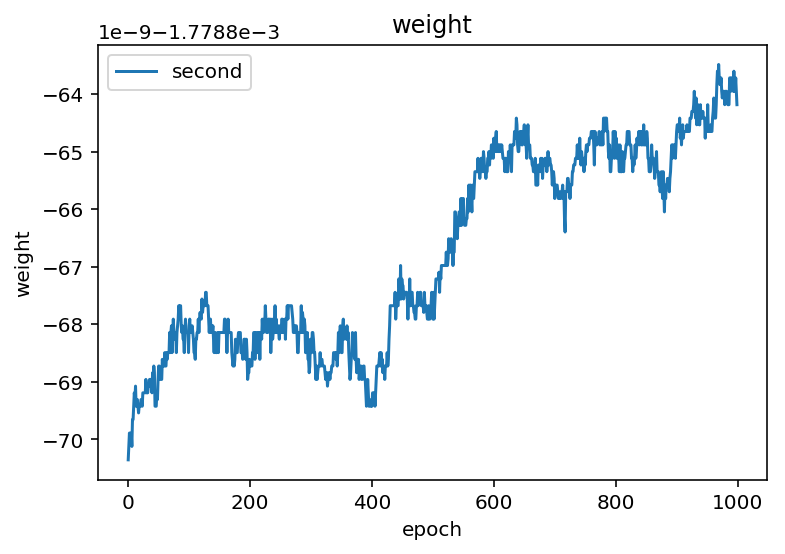

In [111]:
plt.plot(second_layer_weight_avg)
plt.title('weight')
plt.ylabel('weight')
plt.xlabel('epoch')
plt.legend(['second'], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

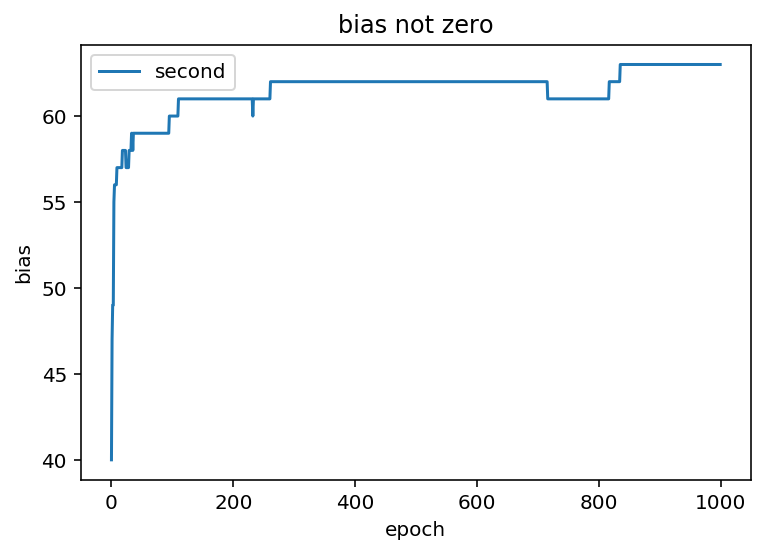

In [112]:
plt.plot(first_layer_bias_not_zero)
plt.title('bias not zero')
plt.ylabel('bias')
plt.xlabel('epoch')
plt.legend(['second'], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

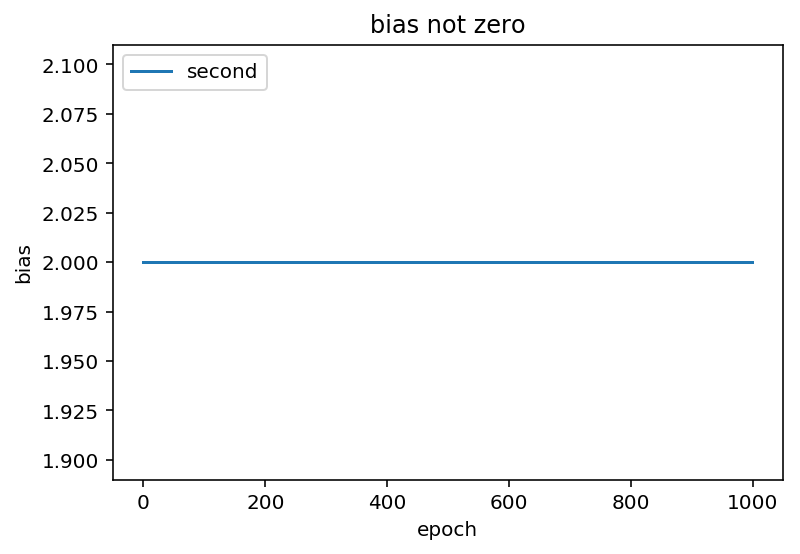

In [113]:
plt.plot(second_layer_bias_not_zero)
plt.title('bias not zero')
plt.ylabel('bias')
plt.xlabel('epoch')
plt.legend(['second'], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

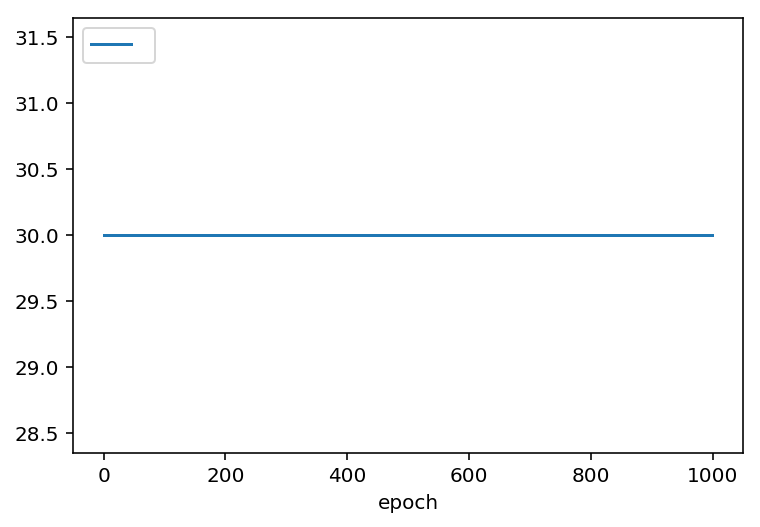

In [114]:
plt.plot(w1nzi)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

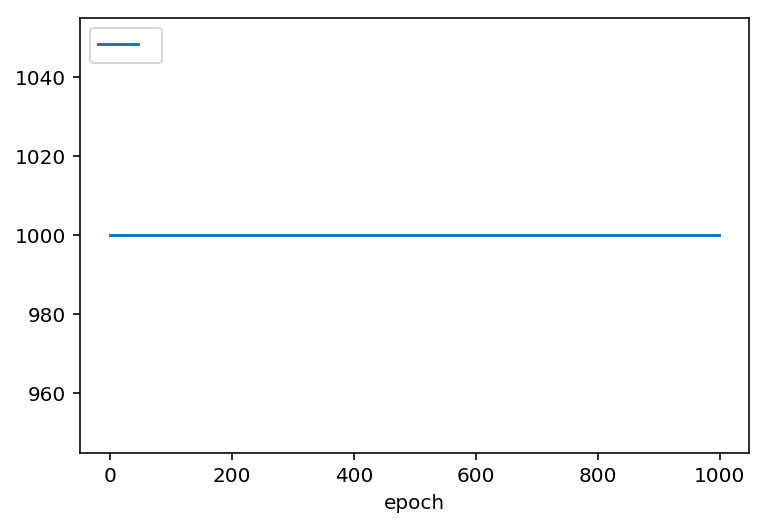

In [115]:
plt.plot(w1nzo)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

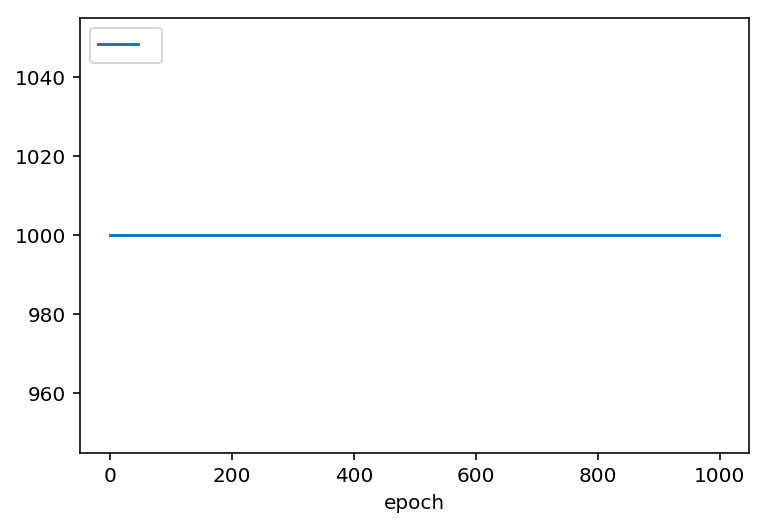

In [116]:
plt.plot(w2nzi)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

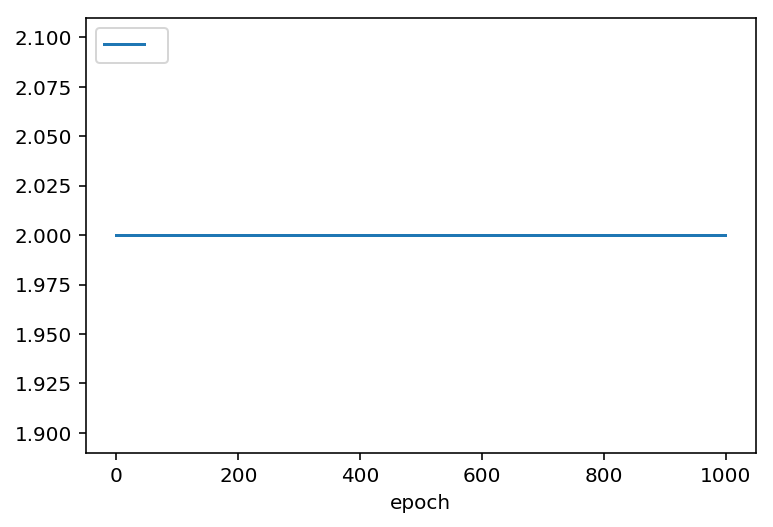

In [117]:
plt.plot(w2nzo)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()